# GenuineEye: RealFake Classifer

# 1. Setting up Environment

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

# 3. Loading Dataset

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2020 files belonging to 2 classes.


In [9]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

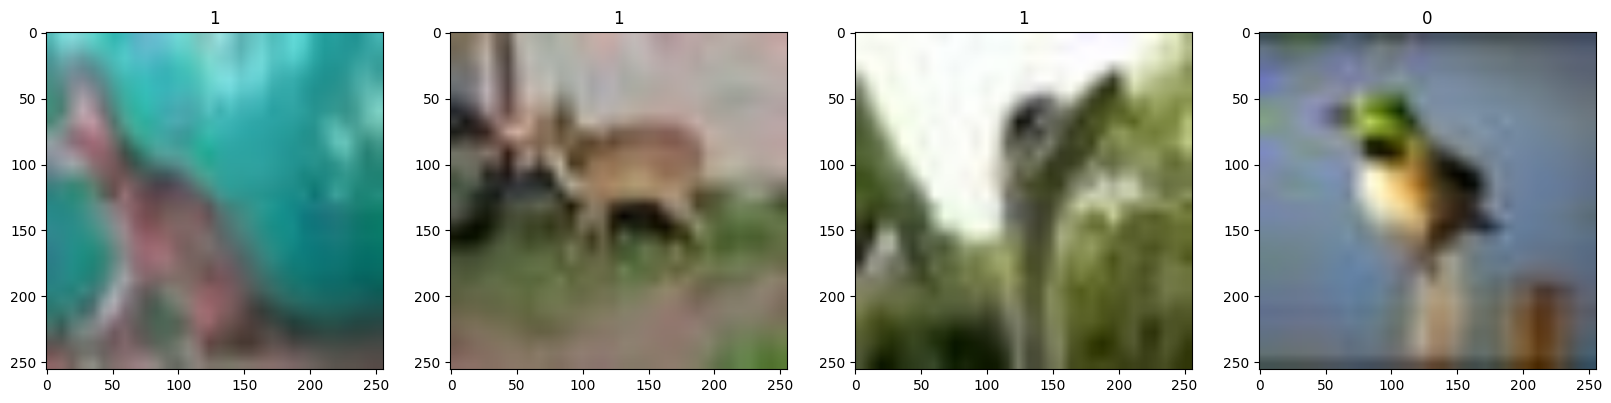

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Upscaleing Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         [[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         [[0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          [0.17254902, 0.3137255 , 0.50980395],
          ...,
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824],
          [0.16078432, 0.23921569, 0.47058824]],
 
         ...,
 
         [[0.10588235, 0.12156863, 0.16470589],
          [0.10588

# 5. Spliting Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

44

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building sequential CNN Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Training Dataset

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 513ms/step - accuracy: 0.6019 - loss: 0.7317 - val_accuracy: 0.7266 - val_loss: 0.5650
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.7134 - loss: 0.5387 - val_accuracy: 0.7240 - val_loss: 0.5197
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 555ms/step - accuracy: 0.8035 - loss: 0.4457 - val_accuracy: 0.7240 - val_loss: 0.5084
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 464ms/step - accuracy: 0.8006 - loss: 0.4175 - val_accuracy: 0.7526 - val_loss: 0.4844
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - accuracy: 0.8427 - loss: 0.3554 - val_accuracy: 0.8281 - val_loss: 0.4211
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 462ms/step - accuracy: 0.8575 - loss: 0.3348 - val_accuracy: 0.7969 - val_loss: 0.4531
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.8949 - loss: 0.2585 - val_accuracy: 0.8047 - val_loss: 0.5205
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step - accuracy: 0.8980 - loss: 0.2713 - val_accu

# 8.Performance Evaluation

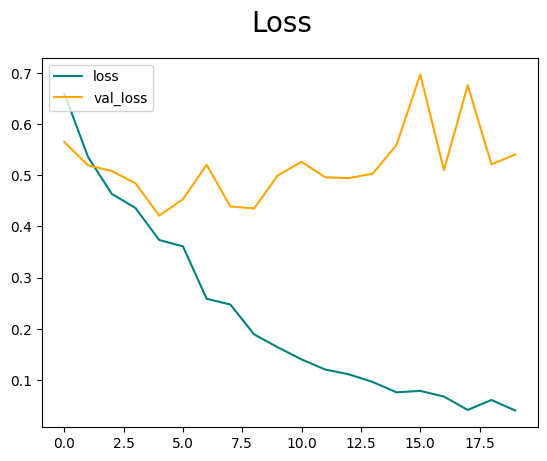

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

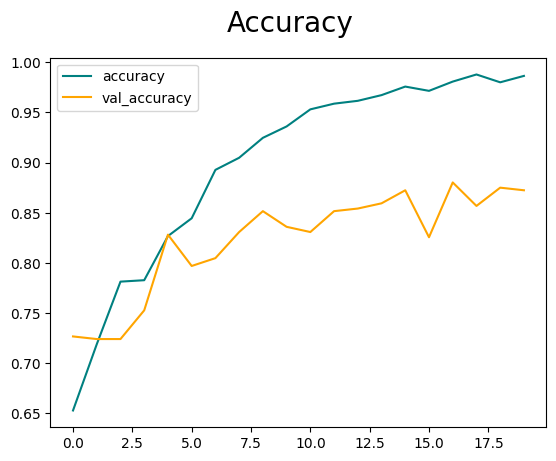

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Metric Evaluation

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85, shape=(), dtype=float32) tf.Tensor(0.86734694, shape=(), dtype=float32) tf.Tensor(0.8541667, shape=(), dtype=float32)


# 10. Testing with custom image

In [33]:
import cv2

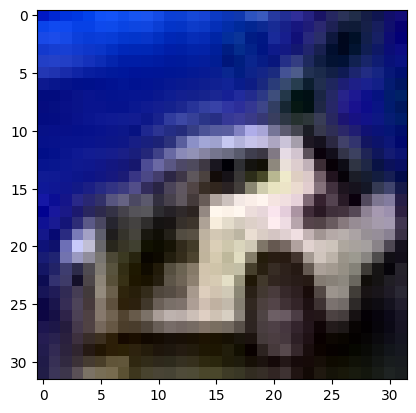

In [36]:
img = cv2.imread('0000 (2).jpg')
plt.imshow(img)
plt.show()

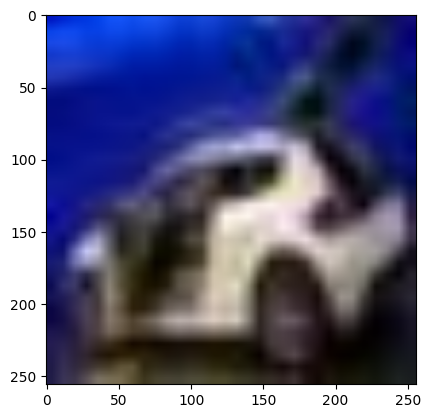

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [39]:
yhat

array([[0.9998946]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is REAL')
else:
    print(f'Predicted class is Fake')

Predicted class is REAL


# 11. Saveing the Model for future use or deployment

In [42]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','genuine_eye_realorfake_imageclassifier.h5'))

In [46]:
new_model = load_model('genuine_eye_realorfake_imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[0.9998946]], dtype=float32)